In [41]:
import numpy as np
import scipy
from activ import load_data
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from activ.data_normalization import data_normalization
from scipy.spatial.distance import pdist
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
import h5py
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from PyUoI.UoINMF import UoINMF
from activ.analytics import heatmap
from sklearn.preprocessing import normalize

In [3]:
nmfdata = load_data(uoinmf=True)

In [96]:
bm_weights = normalize(nmfdata.biomarkers, norm='l1', axis=1)
oc_weights = normalize(nmfdata.outcomes, norm='l1', axis=1)

In [43]:
max_ind = np.argmax(bm_weights, axis=1)

In [60]:
weights_stacked = []
for i in range(bm_weights.shape[1]):
    highest_weights = bm_weights[max_ind==i].mean(axis=0)
    weights_stacked.append(highest_weights)
    print(highest_weights)

[0.5486791  0.09351445 0.06899759 0.01224387 0.21337171 0.06319328]
[0.25576941 0.39284975 0.02310052 0.         0.32828032 0.        ]
[0.10003444 0.         0.43794134 0.03066711 0.34816882 0.08318829]
[nan nan nan nan nan nan]
[0.12925495 0.02405893 0.13458309 0.07880847 0.6045725  0.02872205]
[0.01714304 0.00469564 0.1459214  0.04747099 0.12586157 0.65890736]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
weights_stacked = np.asarray(weights_stacked)

In [70]:
factor1 = weights_stacked[:,0]
factor2 = weights_stacked[:,1]
factor3 = weights_stacked[:,2]
factor4 = weights_stacked[:,3]
factor5 = weights_stacked[:,4]
factor6 = weights_stacked[:,5]

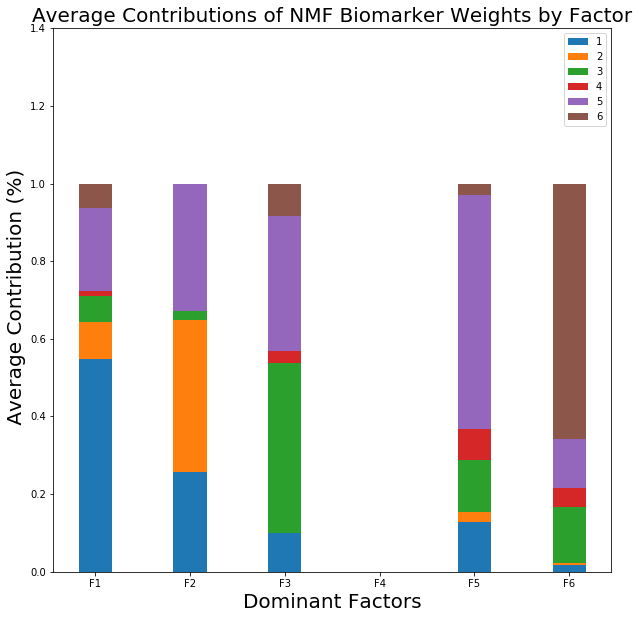

In [95]:
ind=np.arange(6)
width = 0.35       

plt.figure(figsize=(10,10))

p1 = plt.bar(ind, factor1, width)
p2 = plt.bar(ind, factor2, width, bottom=factor1)
p3 = plt.bar(ind, factor3, width, bottom=factor1+factor2)
p4 = plt.bar(ind, factor4, width, bottom=factor1+factor2+factor3)
p5 = plt.bar(ind, factor5, width, bottom=factor1+factor2+factor3+factor4)
p6 = plt.bar(ind, factor6, width, bottom=factor1+factor2+factor3+factor4+factor5)


plt.ylabel(' Average Contribution (%)', fontsize=20)
plt.title('Average Contributions of NMF Biomarker Weights by Factor', fontsize=20)
plt.xticks(ind, ('F1', 'F2', 'F3', 'F4', 'F5', 'F6'))
plt.xlabel('Dominant Factors', fontsize=20)
plt.yticks(np.arange(0,1.6,0.2))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('1', '2', '3', '4', '5', '6'))
plt.savefig('/Users/ahyeon/Desktop/activ misc/bm_factor_barplot.pdf')
plt.show()

In [97]:
max_ind_oc = np.argmax(oc_weights, axis=1)
weights_stacked = []
for i in range(oc_weights.shape[1]):
    highest_weights = oc_weights[max_ind_oc==i].mean(axis=0)
    weights_stacked.append(highest_weights)
    print(highest_weights)
weights_stacked = np.asarray(weights_stacked)

[nan nan nan nan nan nan]
[0.         0.37350597 0.33342404 0.         0.29306998 0.        ]
[0.04864406 0.04069239 0.66696784 0.04578725 0.11322134 0.08468712]
[0.04570343 0.11423032 0.17907675 0.31054826 0.15690429 0.19353694]
[0.06877589 0.07951801 0.22926237 0.13450594 0.43776229 0.0501755 ]
[0.06030973 0.0975304  0.3082696  0.03441282 0.08756184 0.4119156 ]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [98]:
factor1 = weights_stacked[:,0]
factor2 = weights_stacked[:,1]
factor3 = weights_stacked[:,2]
factor4 = weights_stacked[:,3]
factor5 = weights_stacked[:,4]
factor6 = weights_stacked[:,5]

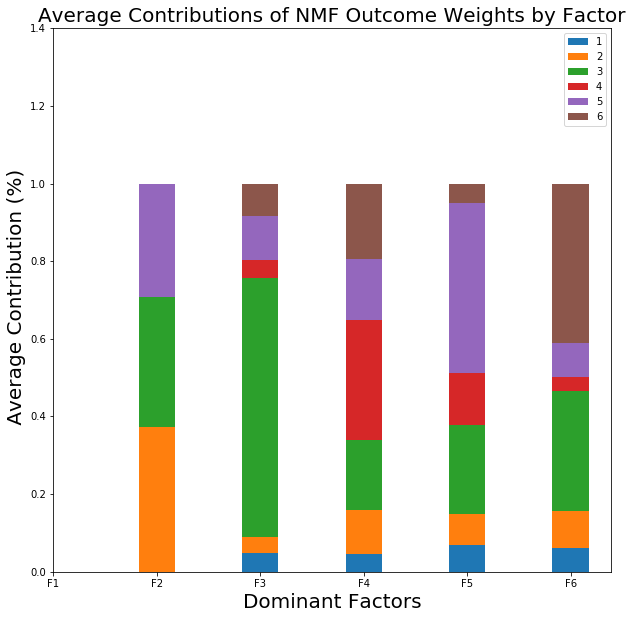

In [99]:
ind=np.arange(6)
width = 0.35       

plt.figure(figsize=(10,10))

p1 = plt.bar(ind, factor1, width)
p2 = plt.bar(ind, factor2, width, bottom=factor1)
p3 = plt.bar(ind, factor3, width, bottom=factor1+factor2)
p4 = plt.bar(ind, factor4, width, bottom=factor1+factor2+factor3)
p5 = plt.bar(ind, factor5, width, bottom=factor1+factor2+factor3+factor4)
p6 = plt.bar(ind, factor6, width, bottom=factor1+factor2+factor3+factor4+factor5)


plt.ylabel(' Average Contribution (%)', fontsize=20)
plt.title('Average Contributions of NMF Outcome Weights by Factor', fontsize=20)
plt.xticks(ind, ('F1', 'F2', 'F3', 'F4', 'F5', 'F6'))
plt.xlabel('Dominant Factors', fontsize=20)
plt.yticks(np.arange(0,1.6,0.2))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('1', '2', '3', '4', '5', '6'))
plt.savefig('/Users/ahyeon/Desktop/activ misc/oc_factor_barplot.pdf')
plt.show()